In [1]:
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy

from matplotlib.ticker import NullFormatter
from sklearn import manifold
from time import time

from tensorflow.examples.tutorials.mnist import input_data
from tsne import bh_sne

from models import FullyConnectedDiscriminator, ConvDiscriminator, FullyConnectedVAE, ConvVAE

result_dir = 'aws-results'

results = [('Conv 2', os.path.join(result_dir, 'Conv2Discriminator/*')),
           ('Conv 5', os.path.join(result_dir, 'Conv5Discriminator/*')),
           ('Conv 8', os.path.join(result_dir, 'Conv8Discriminator/*')),
           ('FC 100 Relu', os.path.join(result_dir, 'FullyConnected100ReluDiscriminator/*')),
           ('FC 100 Sigmoid', os.path.join(result_dir, 'FullyConnected100SigmoidDiscriminator/*')),
           ('FC 10 Relu', os.path.join(result_dir, 'FullyConnected10ReluDiscriminator/*')),
           ('FC 10 Sigmoid', os.path.join(result_dir, 'FullyConnected10SigmoidDiscriminator/*')),
           ('FC 200 Relu', os.path.join(result_dir, 'FullyConnected200ReluDiscriminator/*')),
           ('FC 200 Sigmoid', os.path.join(result_dir, 'FullyConnected200SigmoidDiscriminator/*')),
           ('FC 20 Relu', os.path.join(result_dir, 'FullyConnected20ReluDiscriminator/*')),
           ('FC 40 Relu', os.path.join(result_dir, 'FullyConnected40ReluDiscriminator/*')),
           ('FC 80 Relu', os.path.join(result_dir, 'FullyConnected80ReluDiscriminator/*')),
           ('FC 20 Sigmoid', os.path.join(result_dir, 'FullyConnected20SigmoidDiscriminator/*')),
           ('FC 40 Sigmoid', os.path.join(result_dir, 'FullyConnected40SigmoidDiscriminator/*')),
           ('FC 80 Sigmoid', os.path.join(result_dir, 'FullyConnected80SigmoidDiscriminator/*')),
           ('FC 160 Sigmoid', os.path.join(result_dir, 'FullyConnected160SigmoidDiscriminator/*')),
           ]

# seed = 0
batch_size = 2500

mnist = input_data.read_data_sets('data/', validation_size=batch_size)
images, labels = mnist.validation.next_batch(batch_size)
# bh_sne needs data as float64
images = np.asarray(images).astype('float64')

distance_matrices = []

for i, architecture in enumerate(results):
    name = architecture[0]
    architecture_results = architecture[1]
    for result in glob.glob(architecture_results):
        with open(os.path.join(result, 'config.json'), 'r') as config_file:
            config = json.load(config_file)
            print(config['result_dir'])
            # TODO: the result_dir in the config file should use a relative path
            config['result_dir'] = config['result_dir'].replace('/home/ubuntu/space-of-representations/results', result_dir)
        if config['vae']:
            if config['conv']:
                print('Loading a convolutional vae')
                model = ConvVAE(config)
            else:
                print('Loading a fully connected vae')
                model = FullyConnectedVAE(config)
        else:
            if config['conv']:
                print('Loading a convolutional discriminator')
                model = ConvDiscriminator(config)
            else:
                print('Loading a fully connected discriminator')
                model = FullyConnectedDiscriminator(config)
        sess = model.sess
        representation = sess.run(model.representation, {model.x: images})
        # bh_sne needs data as float64
        representation = np.asarray(representation).astype('float64')
        min_ = np.min(representation)
        max_ = np.max(representation)
        representation = (representation - min_) / (max_ - min_)

        distance_matrices.append(scipy.spatial.distance.pdist(representation, metric='euclidean'))

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
/home/ubuntu/space-of-representations/results/Conv2Discriminator/2017-05-12-23-43-46
Loading a convolutional discriminator
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Loading the model from folder: aws-results/Conv2Discriminator/2017-05-12-23-43-46/checkpoints/
INFO:tensorflow:Restoring parameters from /home/psoulos/workspace/space-of-representations/aws-results/Conv2Discriminator/2017-05-12-23-43-46/checkpoints/checkpoint-50000
/home/ubuntu/space-of-representations/results/Conv2Discriminator/2017-05-12-23-58-48
Loading a convolutional discriminator
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k

Extracting data/t10k-labels-idx1-ubyte.gz
Loading the model from folder: aws-results/Conv8Discriminator/2017-05-13-00-33-33/checkpoints/
INFO:tensorflow:Restoring parameters from /home/psoulos/workspace/space-of-representations/aws-results/Conv8Discriminator/2017-05-13-00-33-33/checkpoints/checkpoint-50000
/home/ubuntu/space-of-representations/results/FullyConnected100ReluDiscriminator/2017-05-12-22-51-38
Loading a fully connected discriminator
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Loading the model from folder: aws-results/FullyConnected100ReluDiscriminator/2017-05-12-22-51-38/checkpoints/
INFO:tensorflow:Restoring parameters from /home/psoulos/workspace/space-of-representations/aws-results/FullyConnected100ReluDiscriminator/2017-05-12-22-51-38/checkpoints/checkpoint-50000
/home/ubuntu/space-of-representations/results/FullyConnected100ReluDiscriminator/20

/home/ubuntu/space-of-representations/results/FullyConnected10ReluDiscriminator/2017-05-12-22-45-22
Loading a fully connected discriminator
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Loading the model from folder: aws-results/FullyConnected10ReluDiscriminator/2017-05-12-22-45-22/checkpoints/
INFO:tensorflow:Restoring parameters from /home/psoulos/workspace/space-of-representations/aws-results/FullyConnected10ReluDiscriminator/2017-05-12-22-45-22/checkpoints/checkpoint-50000
/home/ubuntu/space-of-representations/results/FullyConnected10ReluDiscriminator/2017-05-12-22-41-19
Loading a fully connected discriminator
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Loading the model from folder: aws-results/FullyConnected10ReluDiscriminator/2017-05

Extracting data/t10k-labels-idx1-ubyte.gz
Loading the model from folder: aws-results/FullyConnected200SigmoidDiscriminator/2017-05-12-23-39-18/checkpoints/
INFO:tensorflow:Restoring parameters from /home/psoulos/workspace/space-of-representations/aws-results/FullyConnected200SigmoidDiscriminator/2017-05-12-23-39-18/checkpoints/checkpoint-50000
/home/ubuntu/space-of-representations/results/FullyConnected200SigmoidDiscriminator/2017-05-12-23-34-53
Loading a fully connected discriminator
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Loading the model from folder: aws-results/FullyConnected200SigmoidDiscriminator/2017-05-12-23-34-53/checkpoints/
INFO:tensorflow:Restoring parameters from /home/psoulos/workspace/space-of-representations/aws-results/FullyConnected200SigmoidDiscriminator/2017-05-12-23-34-53/checkpoints/checkpoint-50000
/home/ubuntu/space-of-representation

In [2]:
distance_matrices = np.matrix(distance_matrices)
print('Distance matrices shape: {}'.format(distance_matrices.shape))
# bh_sne needs data as float64
distance_matrices = np.asarray(distance_matrices).astype('float64')

Distance matrices shape: (52, 3123750)


In [3]:
n_neighbors = 4
n_components = 2

t-SNE: 20 sec


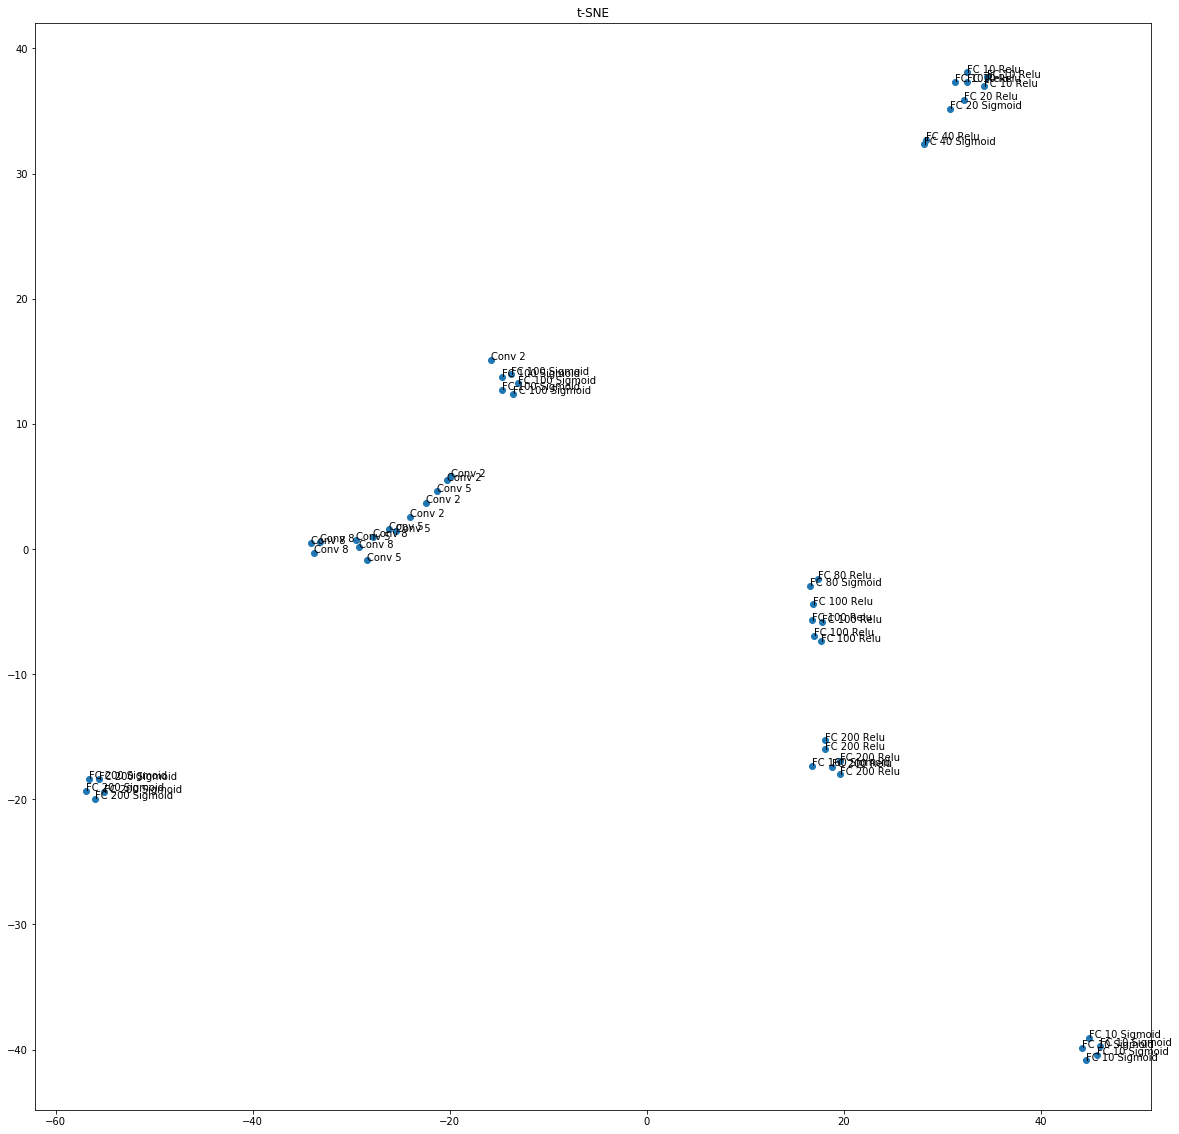

In [4]:
# t-SNE
perplexity = n_neighbors
t0 = time()
meta_sne = bh_sne(distance_matrices, perplexity=perplexity)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
sne_x = meta_sne[:, 0]
sne_y = meta_sne[:, 1]

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(sne_x, sne_y)
names = []
for x in results:
    for i in range(len(glob.glob(x[1]))):
        names.append(x[0])
for i, name in enumerate(names):
    ax.annotate(name, (sne_x[i], sne_y[i]))
plt.title('t-SNE')
plt.show()
#fig.savefig('perplexity {}.png'.format(perplexity))


Isomap: 12 sec


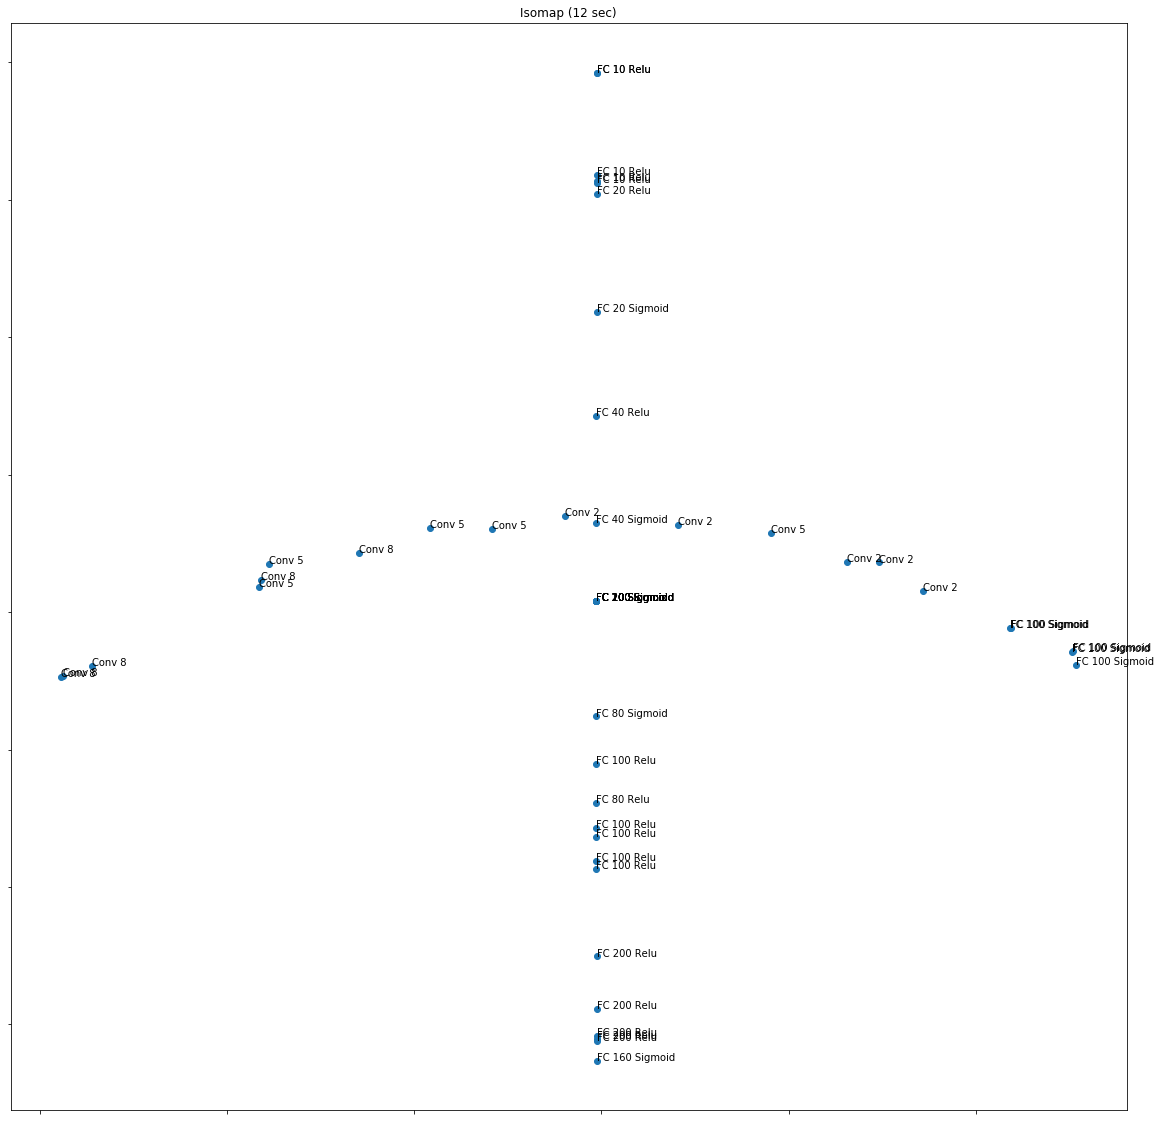

In [5]:
# Isomap
t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(distance_matrices)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(Y[:, 0], Y[:, 1])
for i, name in enumerate(names):
    ax.annotate(name, (Y[i, 0], Y[i, 1]))
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

MDS: 0.63 sec


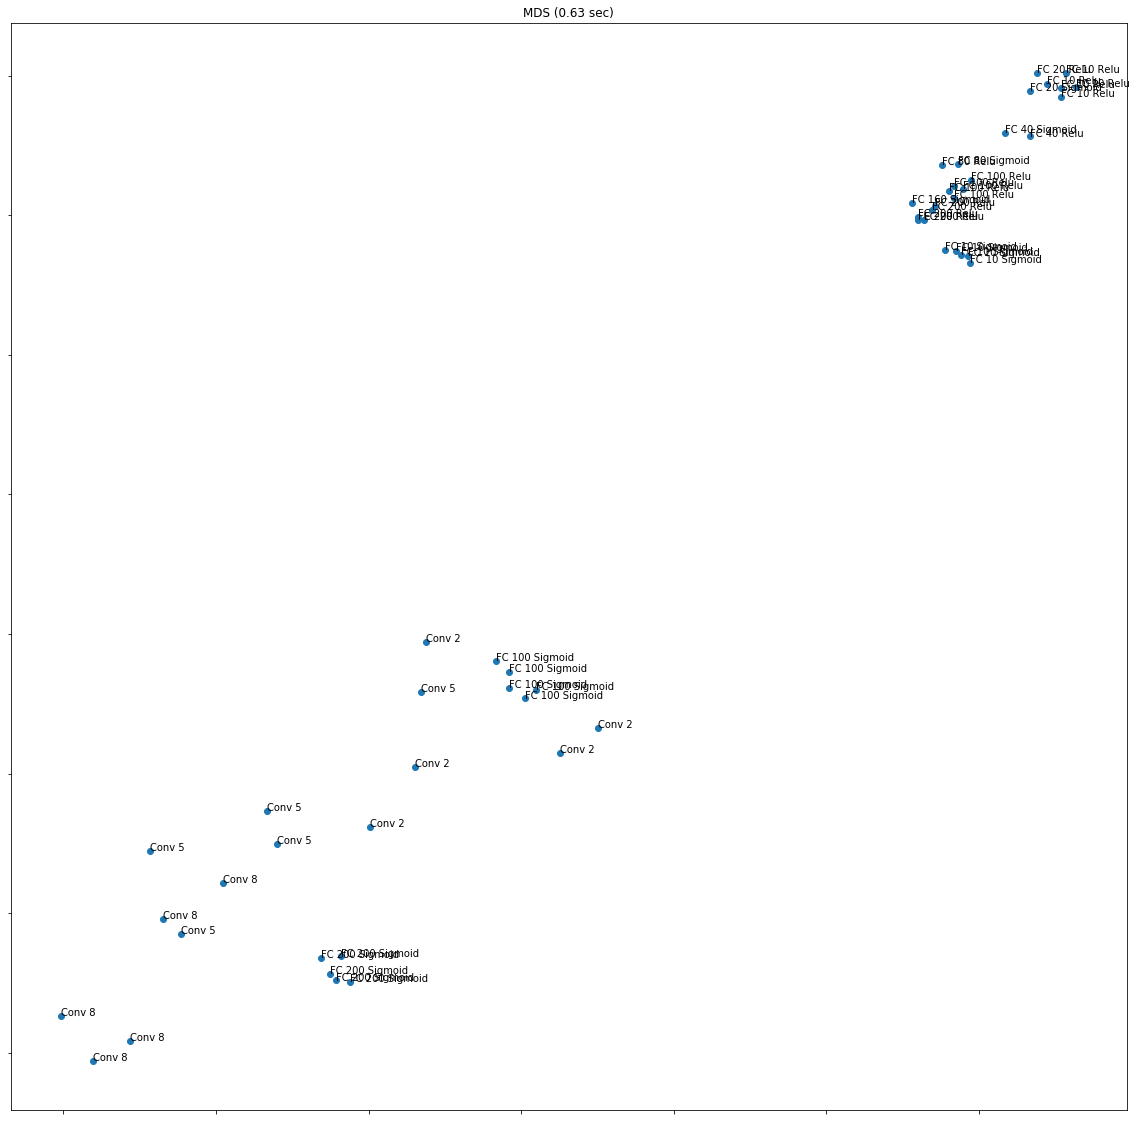

In [6]:
# MDS
t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(distance_matrices)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(Y[:, 0], Y[:, 1])
for i, name in enumerate(names):
    ax.annotate(name, (Y[i, 0], Y[i, 1]))
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

standard: 16 sec


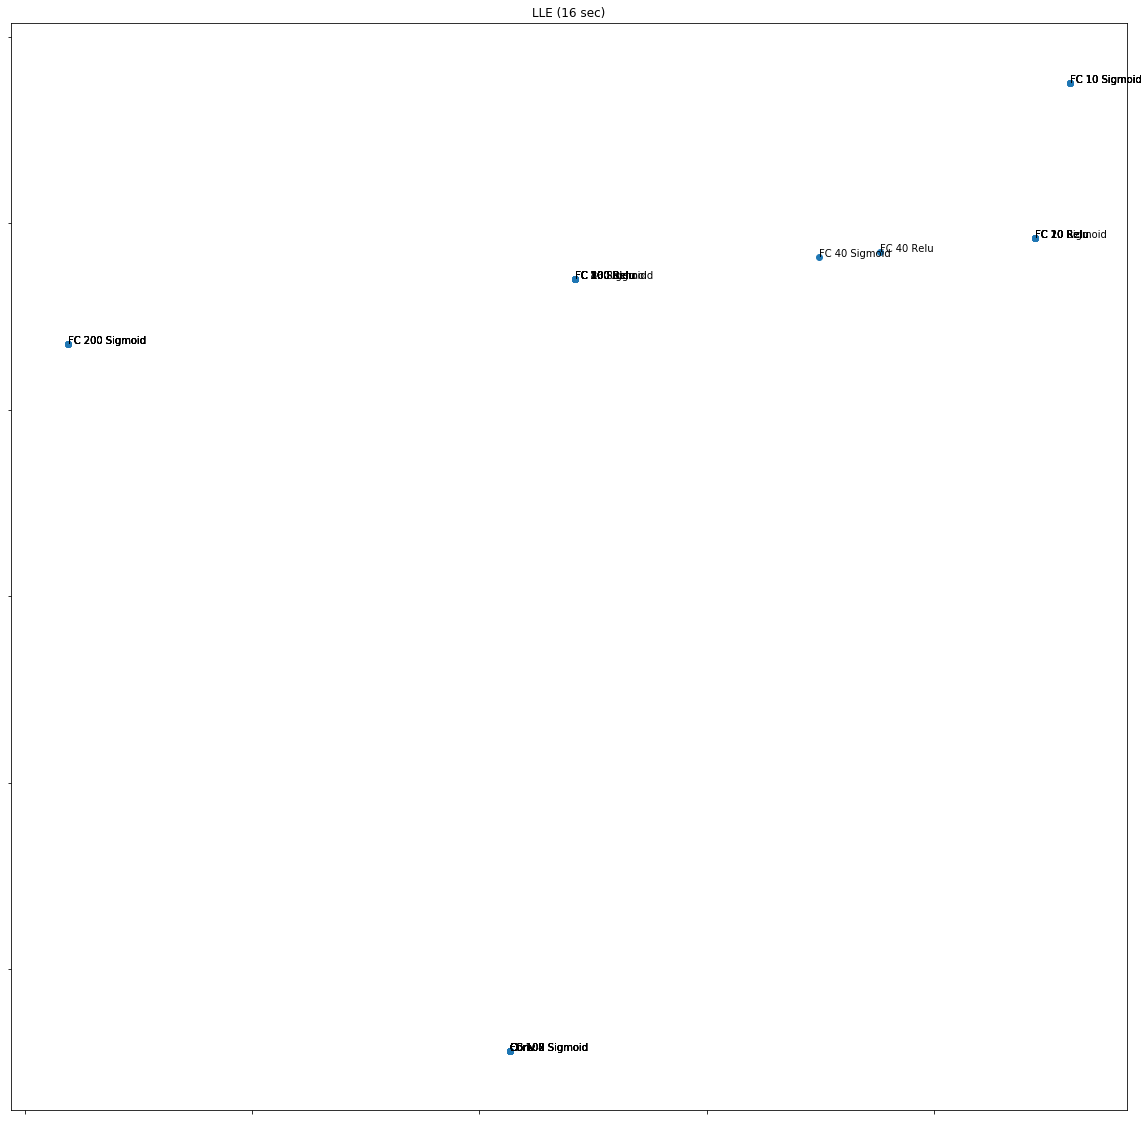

ltsa: 15 sec


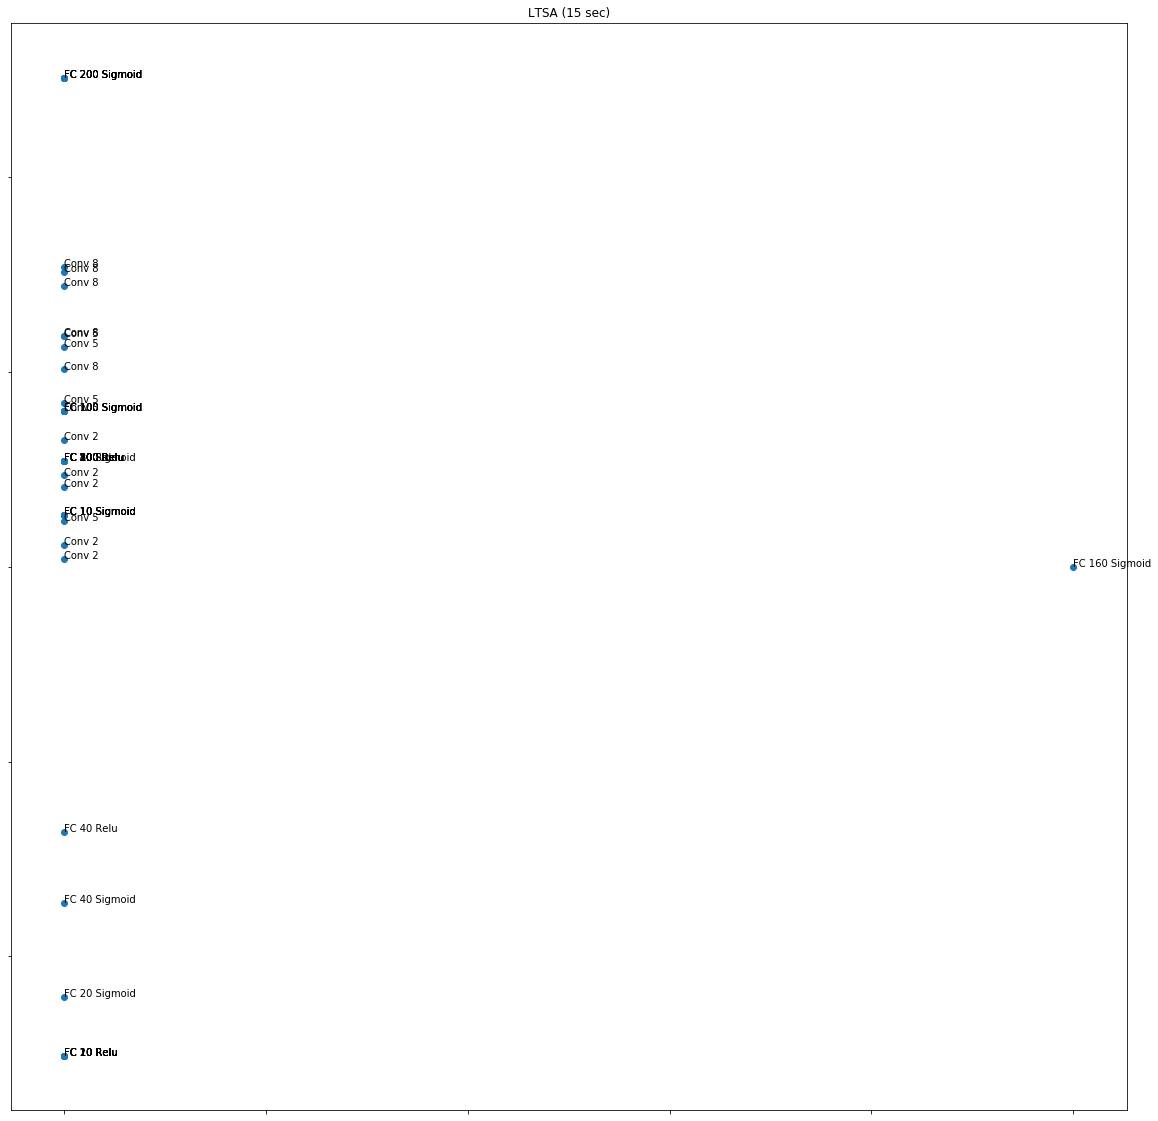

modified: 15 sec


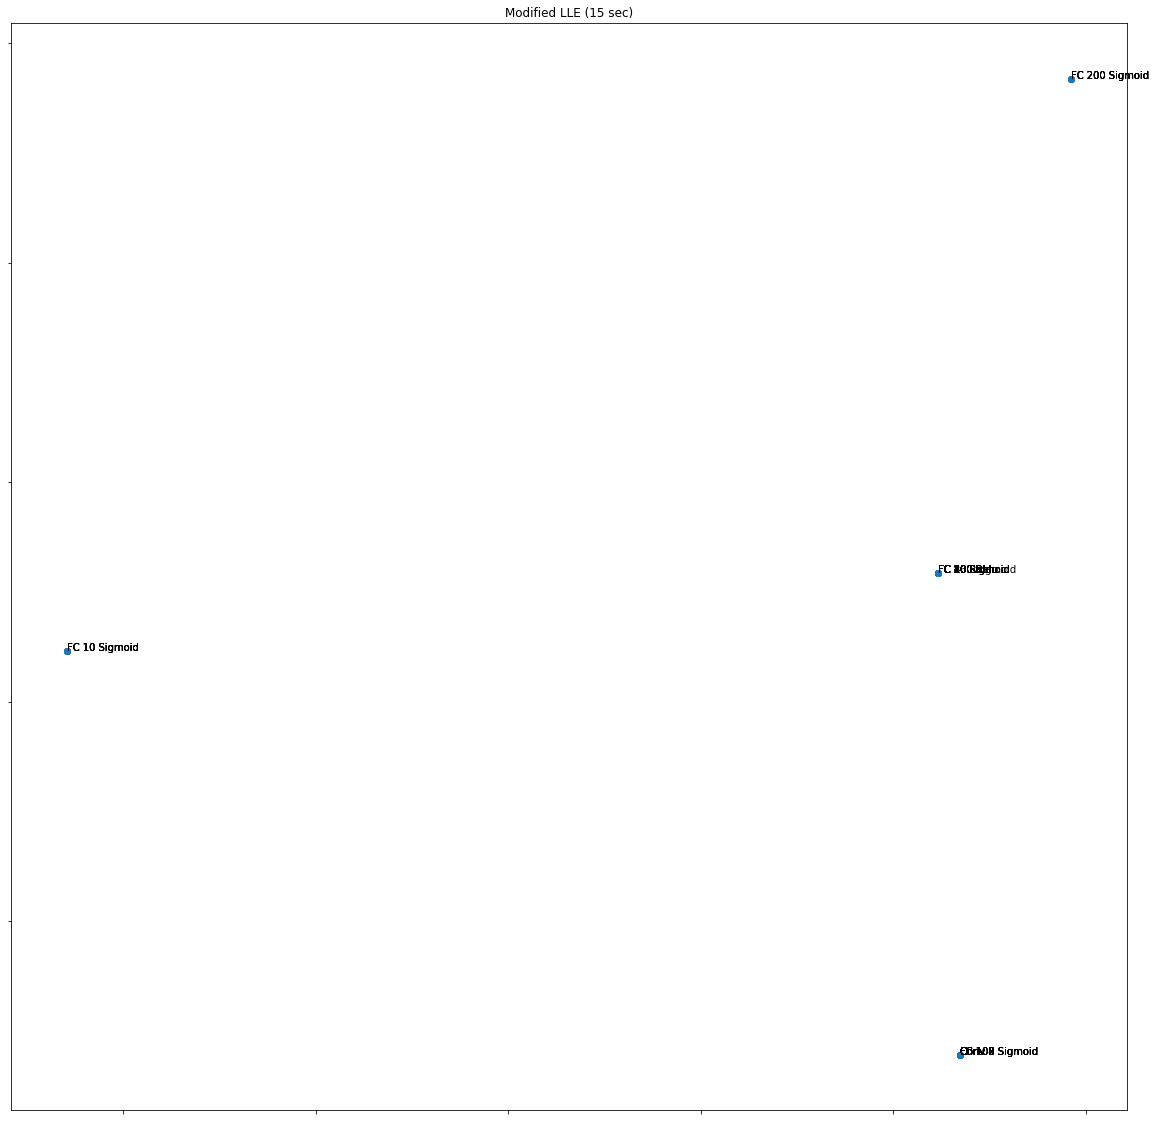

In [7]:
methods = ['standard', 'ltsa', 'modified'] # Removed hessian
labels = ['LLE', 'LTSA', 'Modified LLE']

for index, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(distance_matrices)
    t1 = time()
    print("%s: %.2g sec" % (methods[index], t1 - t0))

    fig, ax = plt.subplots(figsize=(20,20))
    ax.scatter(Y[:, 0], Y[:, 1])
    for i, name in enumerate(names):
        ax.annotate(name, (Y[i, 0], Y[i, 1]))
    plt.title("%s (%.2g sec)" % (labels[index], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    plt.show()

/home/psoulos/bin/anaconda2/envs/sor/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


SpectralEmbedding: 13 sec


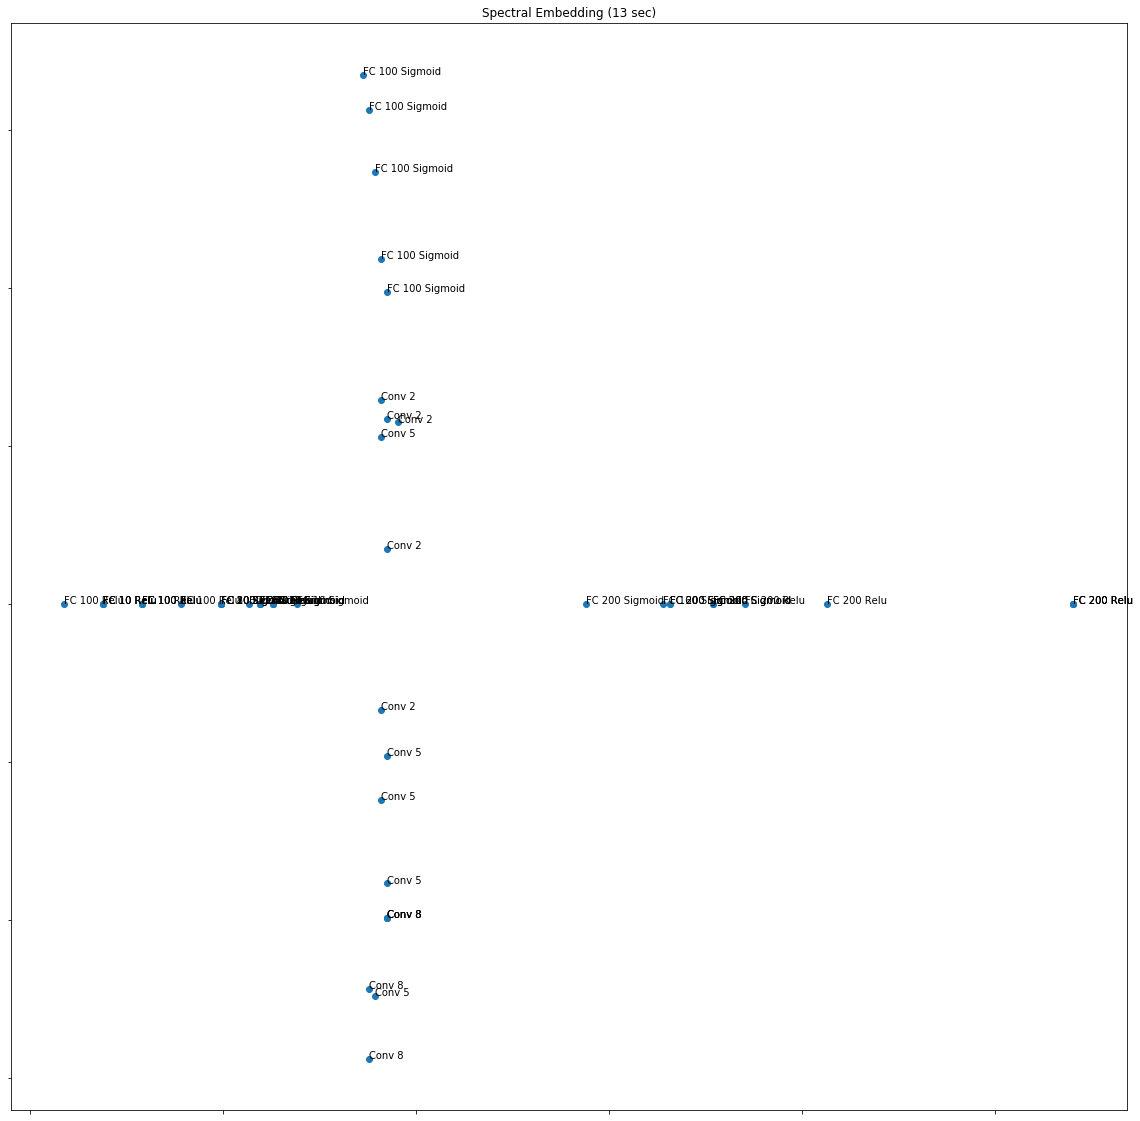

In [8]:
t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(distance_matrices)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(Y[:, 0], Y[:, 1])
for i, name in enumerate(names):
    ax.annotate(name, (Y[i, 0], Y[i, 1]))
plt.title("Spectral Embedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()